In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

import random

from IPython.display import HTML, display
import tabulate

from linear_interpolator import AdaptiveLinearInterpolator, SparseLinearInterpolator, RegularLinearInterpolator
from quadratic_interpolator import AdaptiveQuadraticInterpolator, SparseQuadraticInterpolator, RegularQuadraticInterpolator

In [3]:
# функции двух аргументов
def f2arg(v, a):
	x = v[0]
	y = v[1]
	return np.sin(4.0 * x) + np.cos(4.0 * y) + a * np.sin(16.0 * x * y)


def f1(v): return f2arg(v, 0.001)
def f2(v): return f2arg(v, 0.1)
def f3(v): return f2arg(v, 1)

# функции трех аргументов

def f3arg1(v, a):
	x = v[0]
	y = v[1]
	z = v[2]
	return np.sin(4.0 * x) + np.cos(4.0 * y) + a * np.sin(4.0 * z)

def f4(v): return f3arg1(v, 1)
def f5(v): return f3arg1(v, 0.01)
def f6(v):
	x = v[0]
	y = v[1]
	z = v[2]
	return np.sin(4.0 * x) + np.cos(16.0 * x * y) + np.sin(4.0 * z)
def f7(v):
	x = v[0]
	y = v[1]
	z = v[2]
	return np.sin(4.0 * x) + np.cos(64.0 * x * y * z) + np.sin(4.0 * z)

In [4]:
def display_table(table, caption):
    display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html',) \
        .replace('<table>\n', f'<table>\n<caption>{caption}</caption>\n')))

# Линейная интерполяция
## Функции 2-х переменных

In [5]:
f2args = [f1, f2, f3]

def plot_2d_grid(interpolator, name):
    points = []
    for ((l, i), a) in interpolator.basis.items():
        x = tuple(1 / (2 ** l[k]) * i[k] for k in range(interpolator.dim))
        f = interpolator(x)
        points.append(x + (f,))

    fig = plt.figure(figsize=(15, 15))
    fig.suptitle(name, fontsize=20)
    
    xs, ys, zs = zip(*points)
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax2 = fig.add_subplot(2, 2, 2)
    ax.scatter3D(xs, ys, zs)
    ax.set_title('сетка/значение в узле')
    ax2.plot(xs, ys, 'b.')
    ax2.set_title('сетка')

def estimate_error(interpolator, n_samples=100):
    err = 0
    for _ in range(n_samples):
        x = [random.random() for _ in range(interpolator.dim)]
        err = max(err, abs(f(x) - interpolator.eval(x)))
        
    return err

### Полная сетка

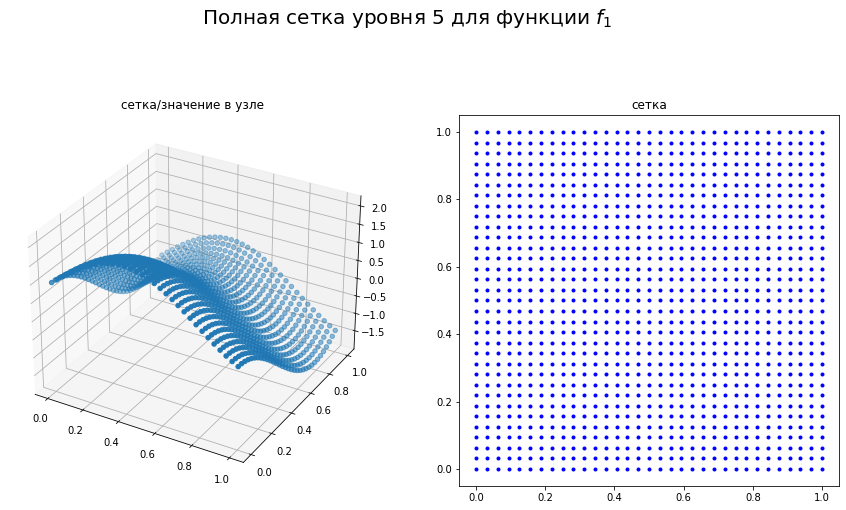

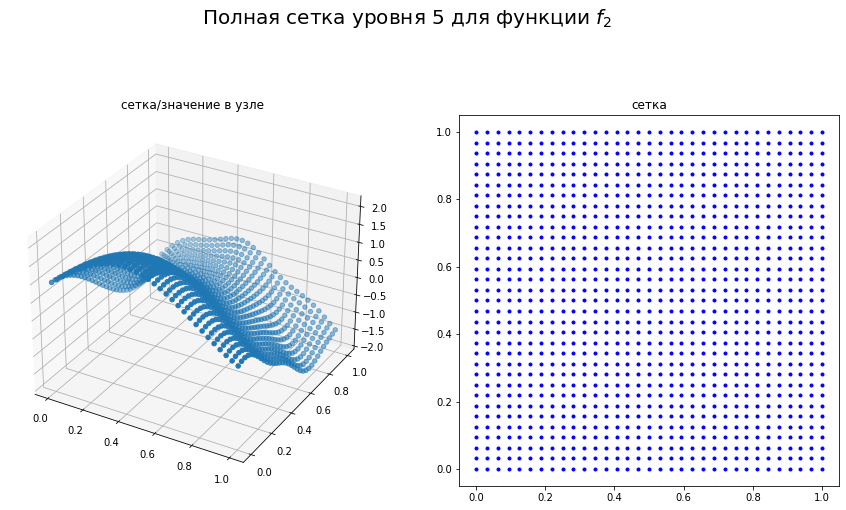

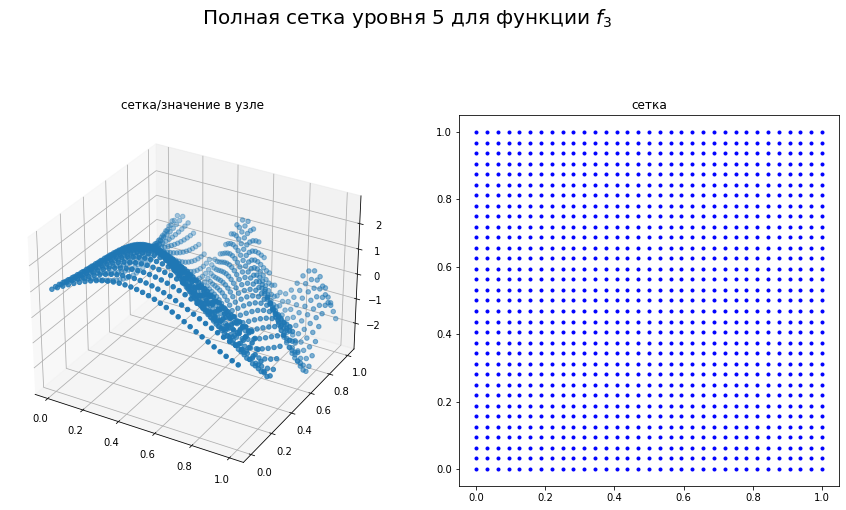

In [37]:
max_levels = [3, 4, 5, 6, 7, 8]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = RegularLinearInterpolator(f, 2, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level:
            plot_2d_grid(interpolator, f'Полная сетка уровня {max_level} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с полной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с полной сеткой')

### Разреженная сетка

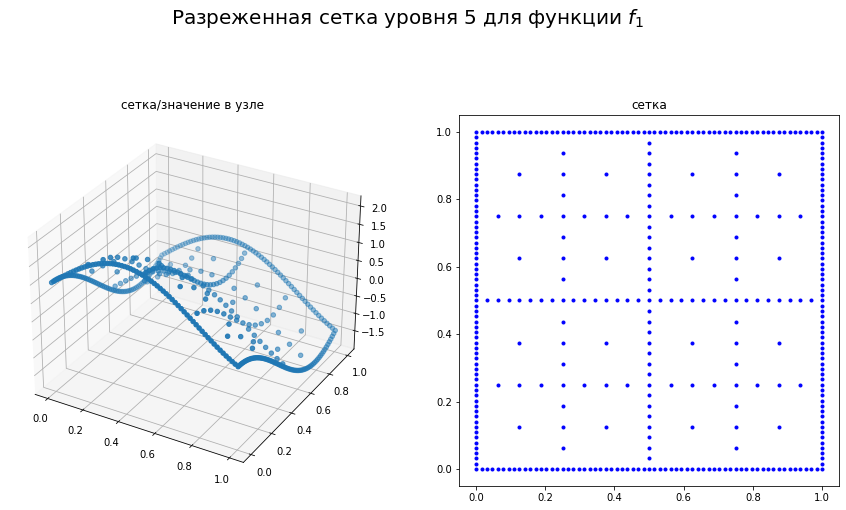

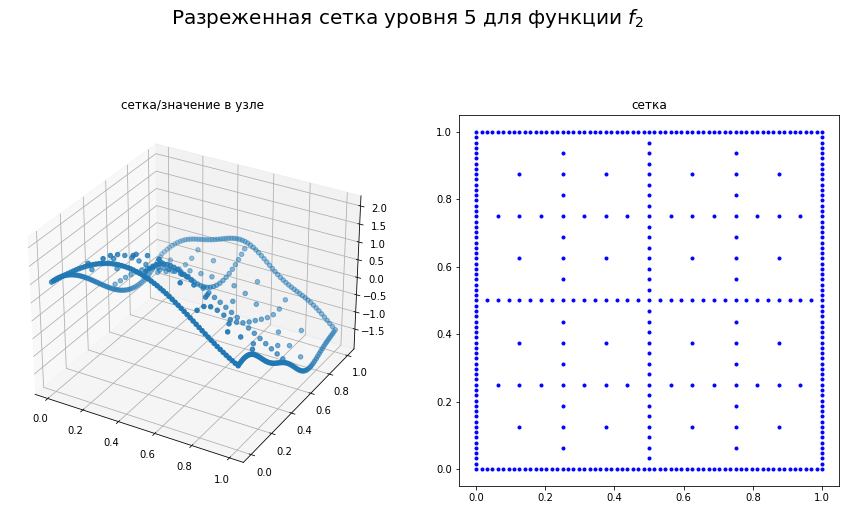

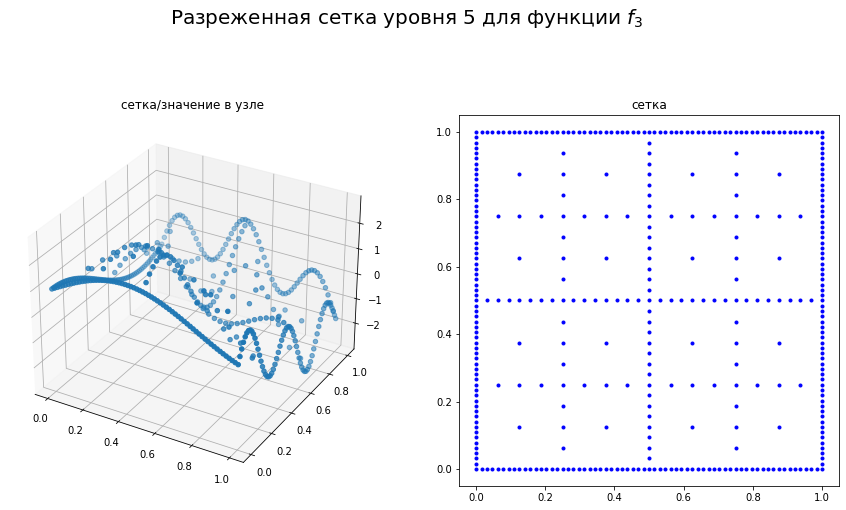

In [38]:
max_levels = [3, 4, 5, 6, 7, 8]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = SparseLinearInterpolator(f, 2, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level:
            plot_2d_grid(interpolator, f'Разреженная сетка уровня {max_level} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с разреженной сеткой')

### Адаптиная разреженная сетка

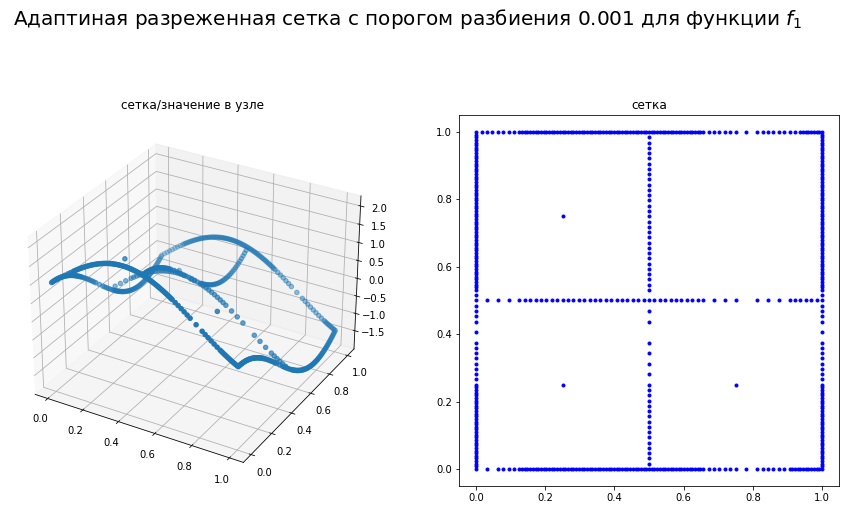

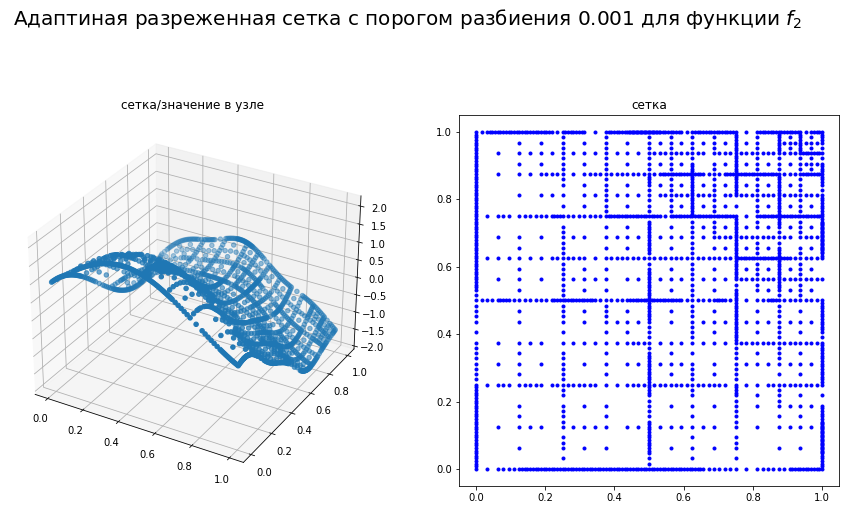

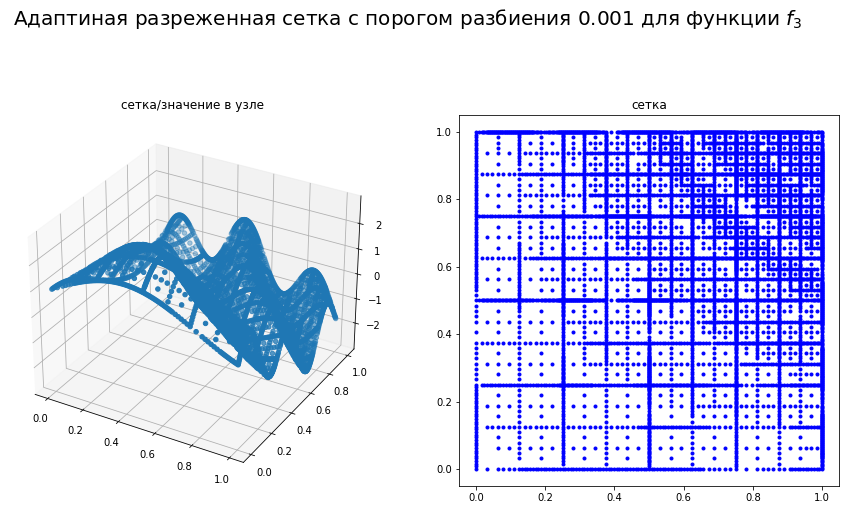

In [6]:
# Адаптиная разреженная сетка
epss = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

display_eps = 1e-3

headers = ['Функция\Порог разбиения сетки'] + epss

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for eps in epss:
        interpolator = AdaptiveLinearInterpolator(f, 2, eps)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if display_eps == eps:
            plot_2d_grid(interpolator, f'Адаптиная разреженная сетка с порогом разбиения {eps} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с адаптиной разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с адаптиной разреженной сеткой')

## Функции 3-х переменных

In [40]:
f3args = [f4, f5, f6, f7]

In [41]:
def plot_3d_grid(interpolator, name):
    points = []
    for ((l, i), a) in interpolator.basis.items():
        x = tuple(1 / (2 ** l[k]) * i[k] for k in range(interpolator.dim))
        points.append(x)

    fig = plt.figure(figsize=(15, 15))
    fig.suptitle(name, fontsize=20)
    
    xs, ys, zs = zip(*points)
    ax = fig.add_subplot(projection='3d')
    ax.scatter3D(xs, ys, zs)

### Полная сетка

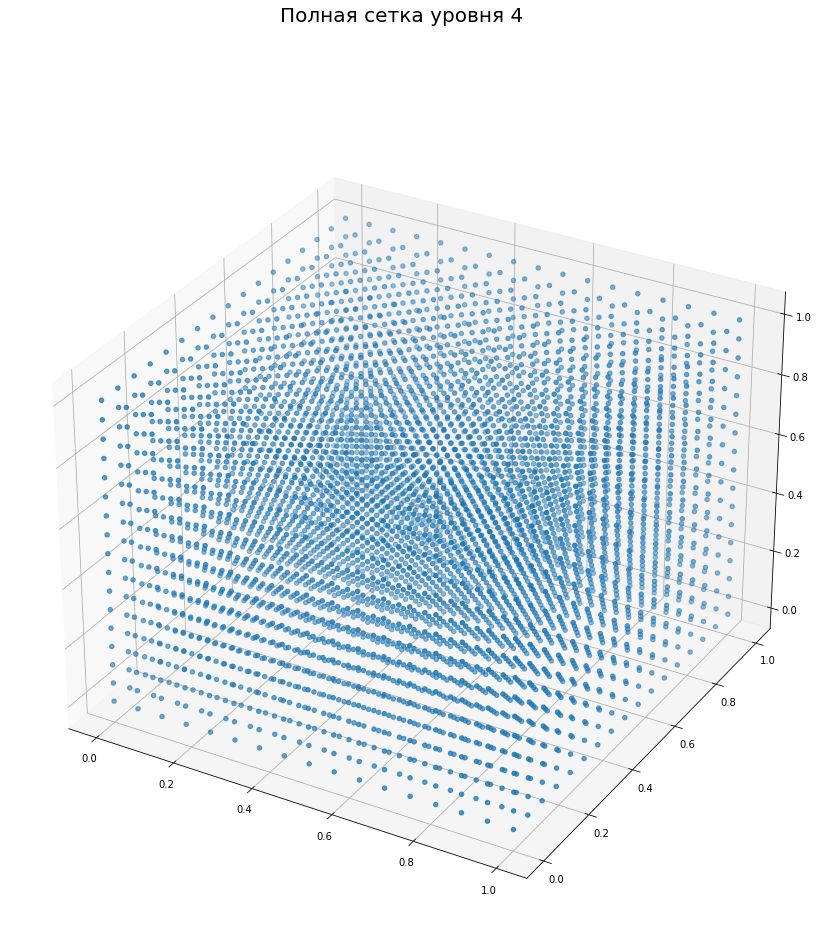

In [42]:
max_levels = [3, 4, 5]

display_level = 4

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = RegularLinearInterpolator(f, 3, max_level)
        
        basis_count_row.append(len(interpolator.basis))

        error_row.append(estimate_error(interpolator))

        if max_level == display_level and i_f==0: # ибо каждый раз ждать надоело, чтобы не строить одно и то же 
            plot_3d_grid(interpolator, f'Полная сетка уровня {max_level}')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с полной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с полной сеткой')

### Разреженная сетка

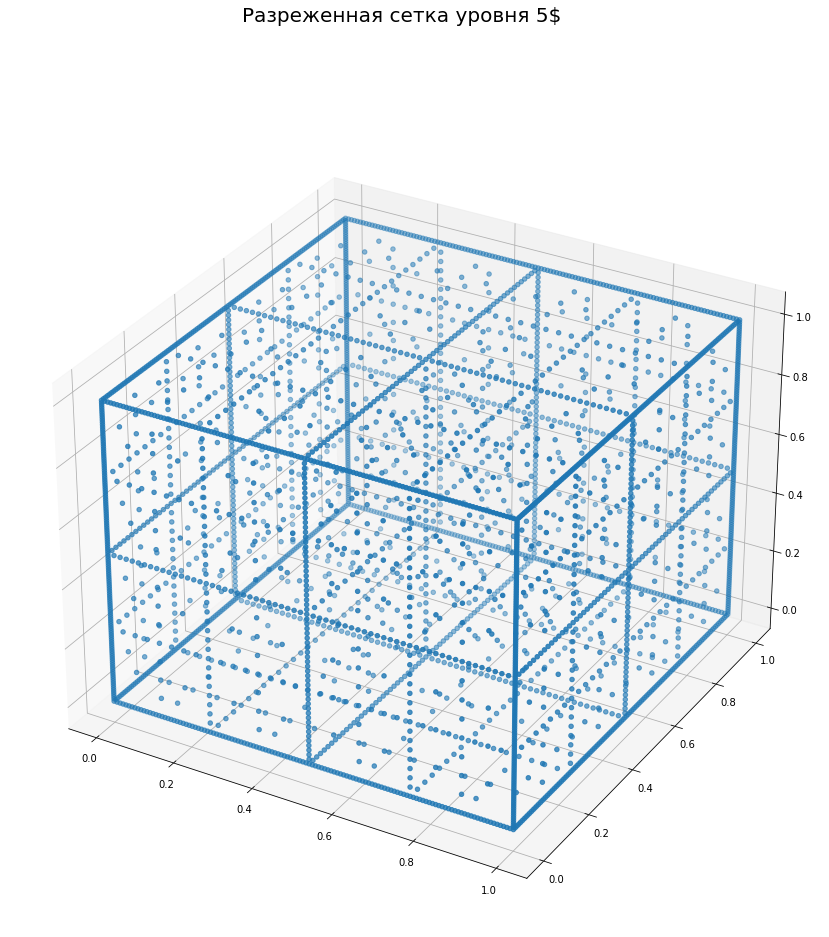

In [43]:
max_levels = [3, 4, 5, 6]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = SparseLinearInterpolator(f, 3, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level and i_f==0:
            plot_3d_grid(interpolator, f'Разреженная сетка уровня {max_level}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с разреженной сеткой')

### Адаптиная разреженная сетка

processing f1 ..
eps=0.1
eps=0.01
eps=0.001
processing f2 ..
eps=0.1
eps=0.01
eps=0.001
processing f3 ..
eps=0.1
eps=0.01
eps=0.001
processing f4 ..
eps=0.1
eps=0.01


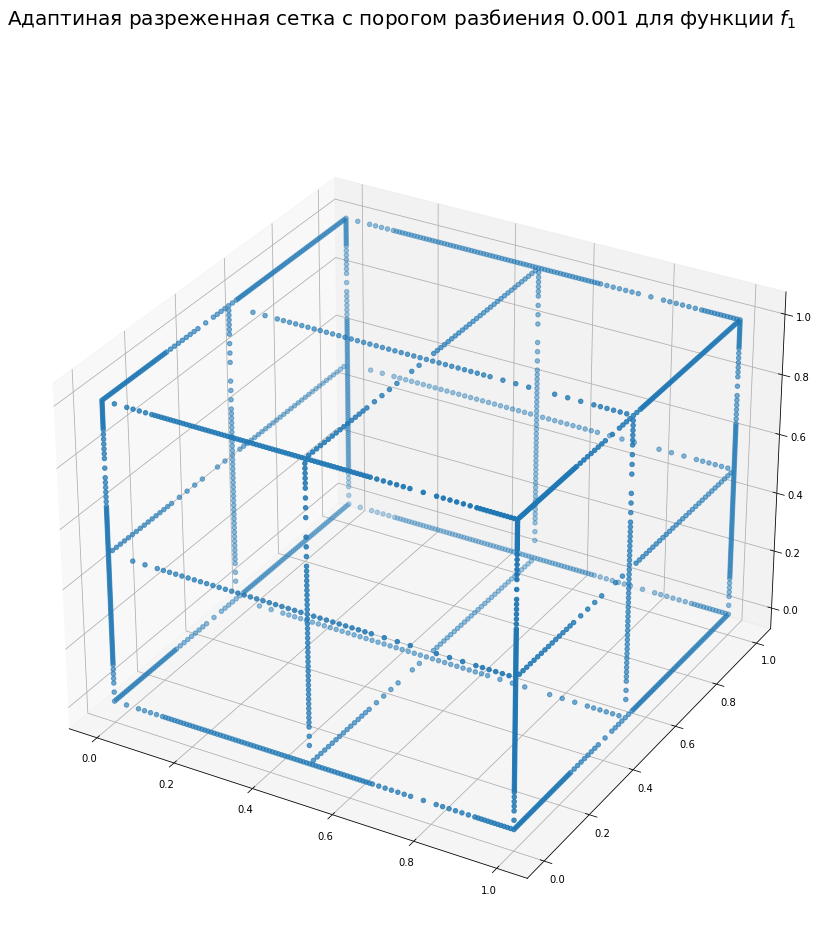

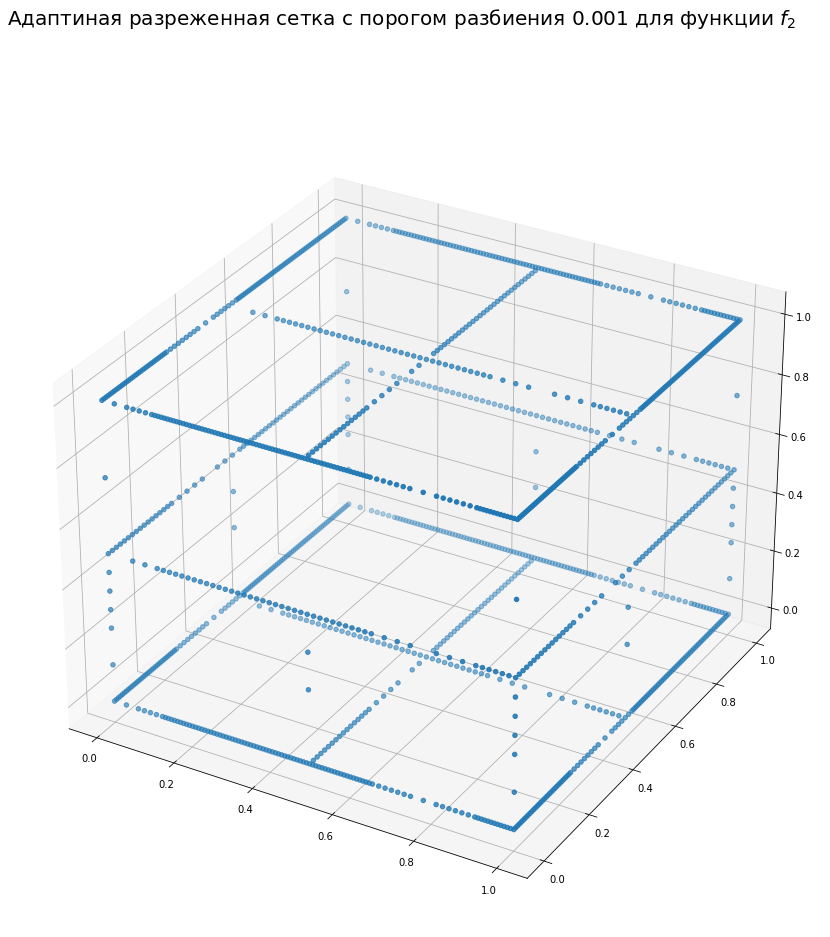

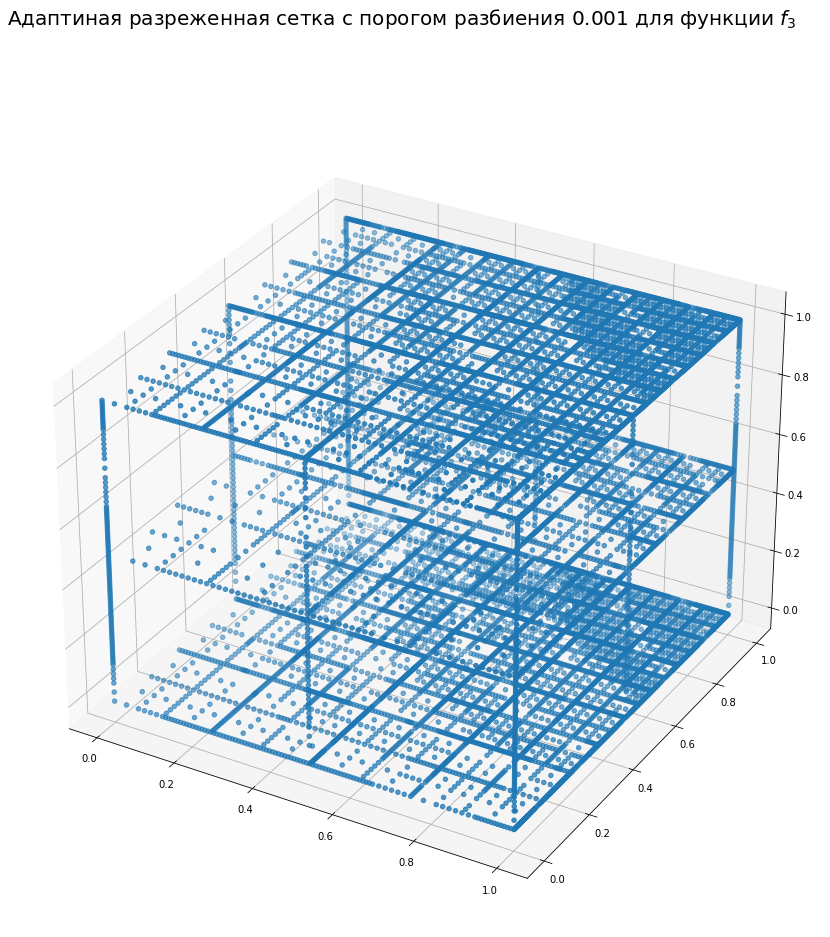

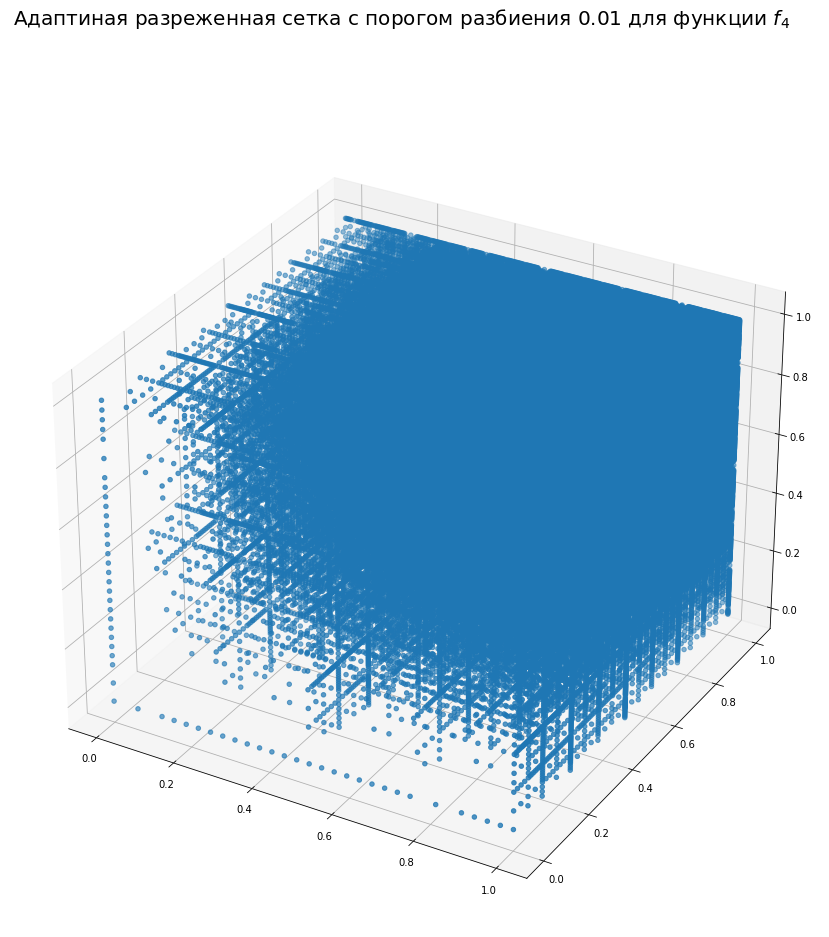

In [54]:
epss = [1e-1, 1e-2, 1e-3]

display_eps = 1e-3

headers = ['Функция\Порог разбиения сетки'] + epss

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    print(f'processing {f_name} ..')
    error_row = [f_name]
    basis_count_row = [f_name]
    for eps in epss:
        print(f'{eps=}')
        interpolator = AdaptiveLinearInterpolator(f, 3, eps)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))
        
        if f == f7:
            if eps == 1e-2: # очень-очень долго строиться 1e-3 для 4-й функции
                plot_3d_grid(interpolator, f'Адаптиная разреженная сетка с порогом разбиения {eps} для функции $f_{i_f+1}$')
                basis_count_row.append('-')
                error_row.append('-')
                break
        else:
            if display_eps == eps:
                plot_3d_grid(interpolator, f'Адаптиная разреженная сетка с порогом разбиения {eps} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при линейной итерполяции с адаптиной разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при линейной интерполяции с адаптиной разреженной сеткой')

# Квадратичная интерполяция
## Функции 2-х переменных
### Полная сетка

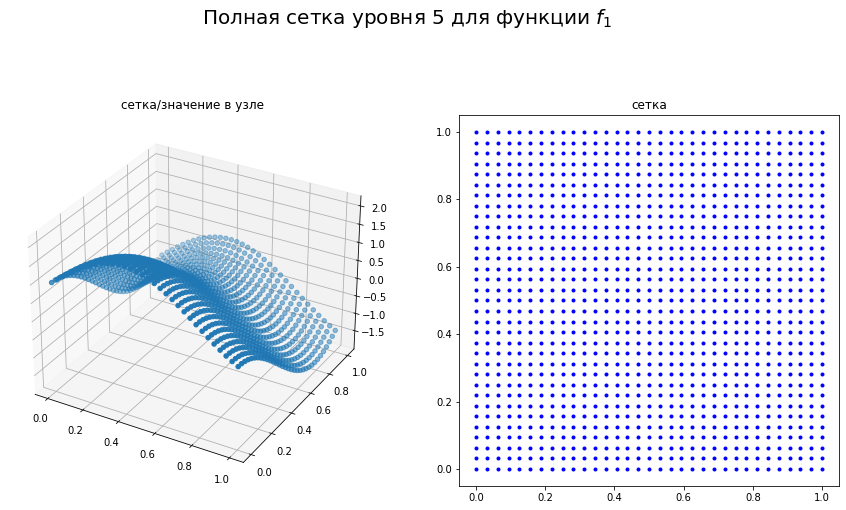

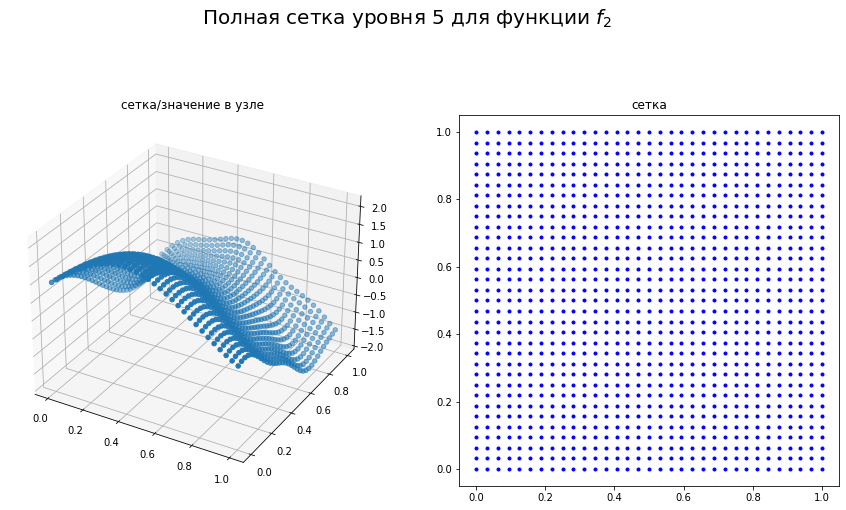

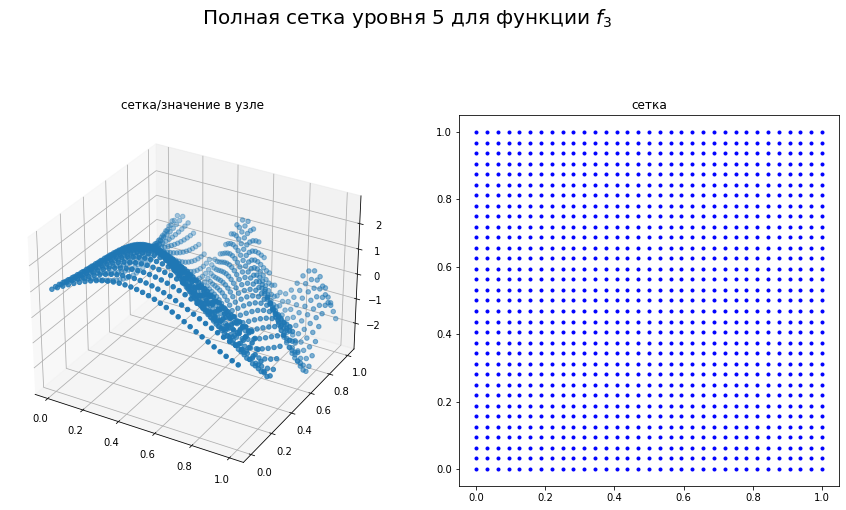

In [55]:
max_levels = [3, 4, 5, 6]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = RegularQuadraticInterpolator(f, 2, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level:
            plot_2d_grid(interpolator, f'Полная сетка уровня {max_level} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с полной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с полной сеткой')

### Разреженная сетка

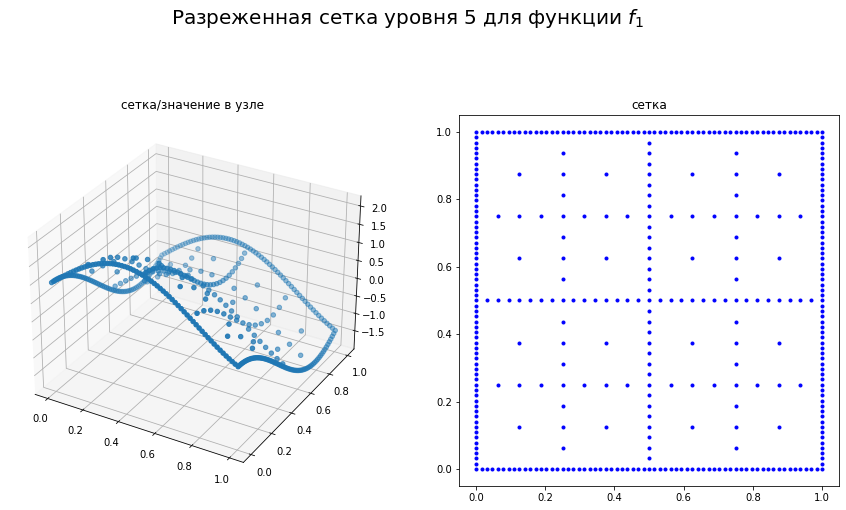

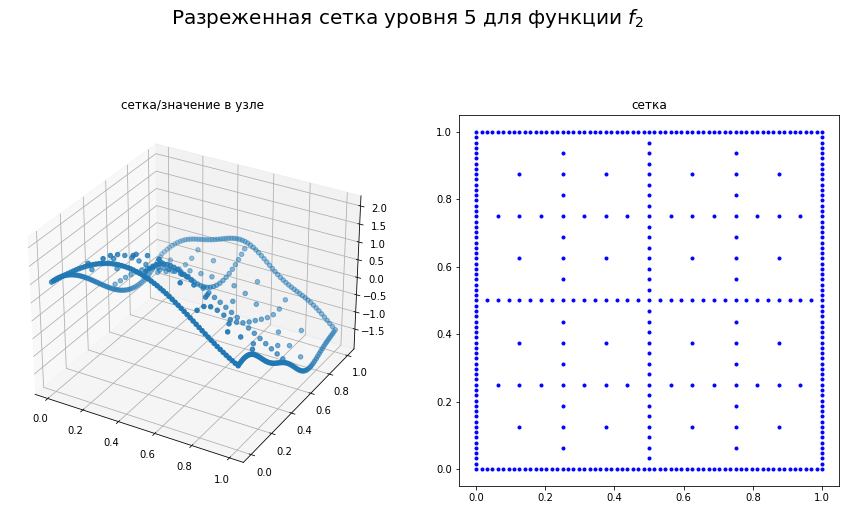

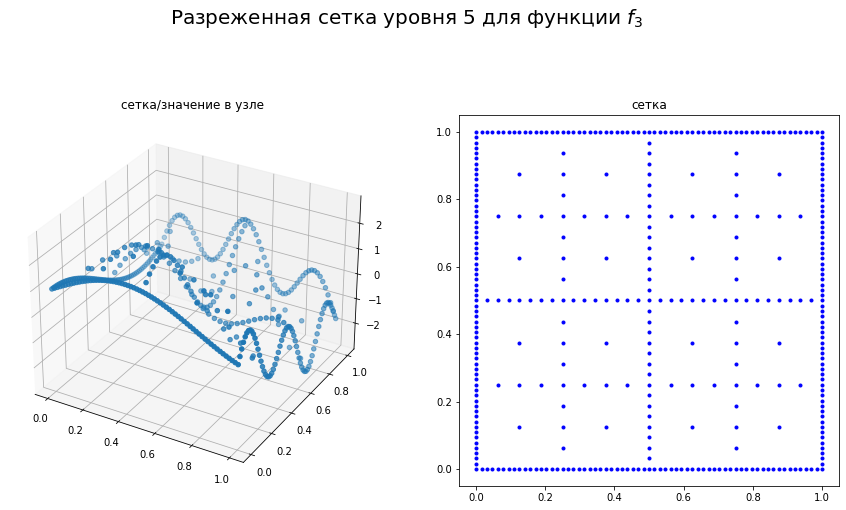

In [56]:
max_levels = [3, 4, 5, 6, 7, 8]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = SparseQuadraticInterpolator(f, 2, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level:
            plot_2d_grid(interpolator, f'Разреженная сетка уровня {max_level} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с разреженной сеткой')

### Адаптиная разреженная сетка

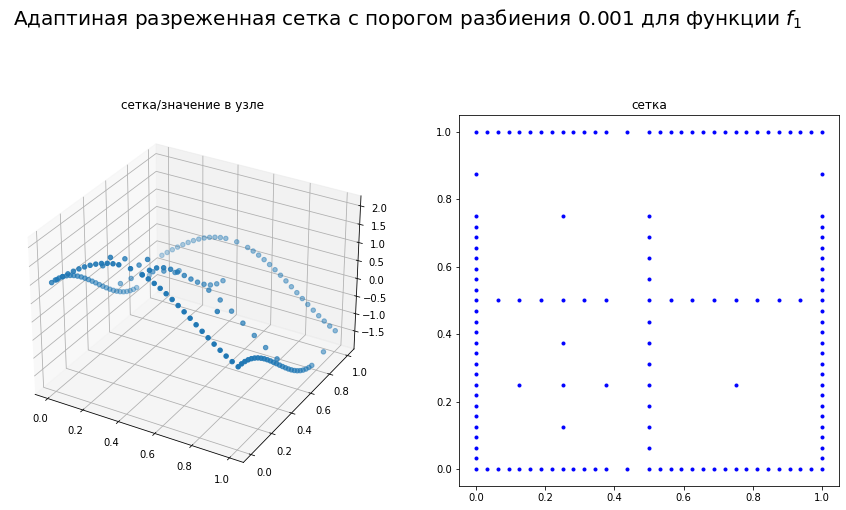

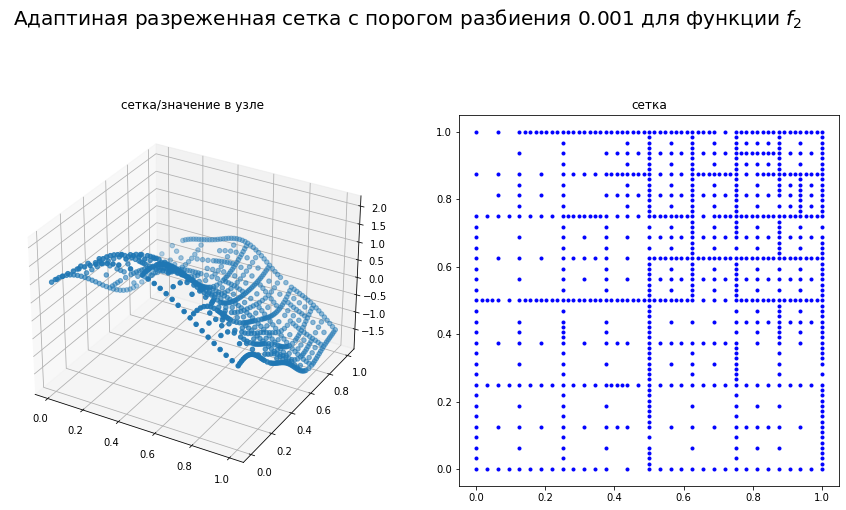

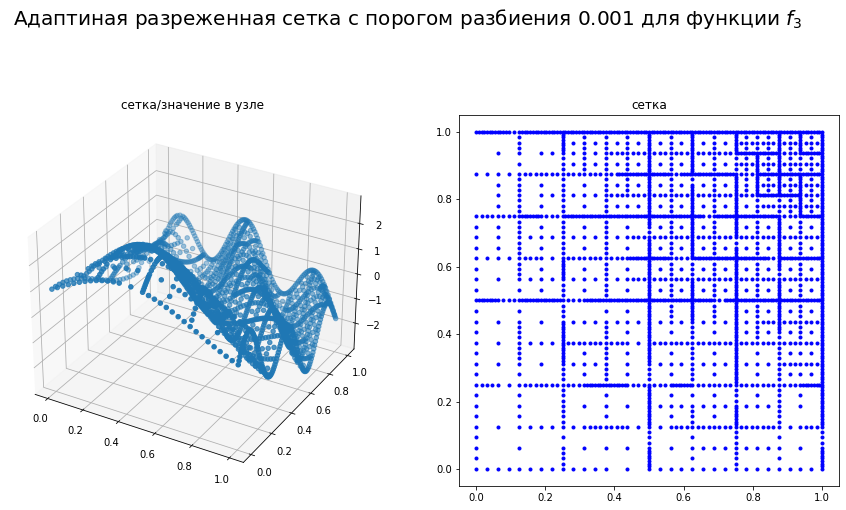

In [61]:
epss = [1e-1, 1e-2, 1e-3]

display_eps = 1e-3

headers = ['Функция\Порог разбиения сетки'] + epss

error_table = []
basis_count_table = []
for i_f, f in enumerate(f2args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for eps in epss:
        interpolator = AdaptiveQuadraticInterpolator(f, 2, eps)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if display_eps == eps:
            plot_2d_grid(interpolator, f'Адаптиная разреженная сетка с порогом разбиения {eps} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с адаптиной разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с адаптиной разреженной сеткой')

## Функции 3-х переменных
### Полная сетка

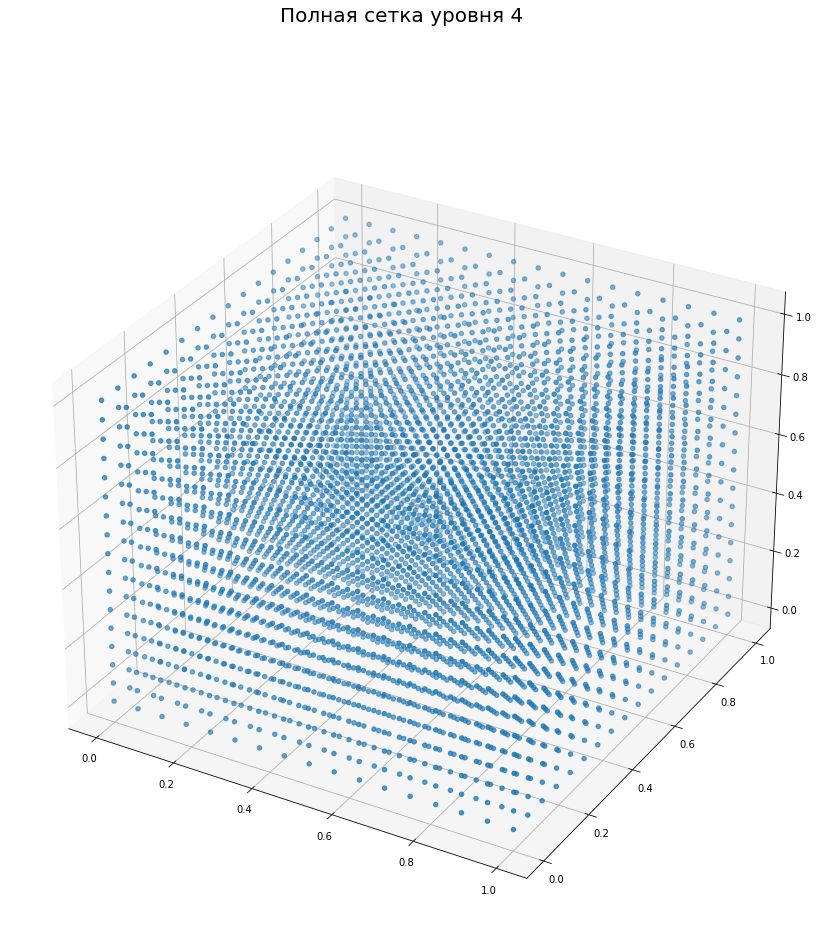

In [58]:
max_levels = [3, 4, 5]

display_level = 4

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = RegularQuadraticInterpolator(f, 3, max_level)
        
        basis_count_row.append(len(interpolator.basis))

        error_row.append(estimate_error(interpolator))

        if max_level == display_level and i_f==0: # ибо каждый раз ждать надоело, чтобы не строить одно и то же 
            plot_3d_grid(interpolator, f'Полная сетка уровня {max_level}')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с полной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с полной сеткой')

### Разреженная сетка

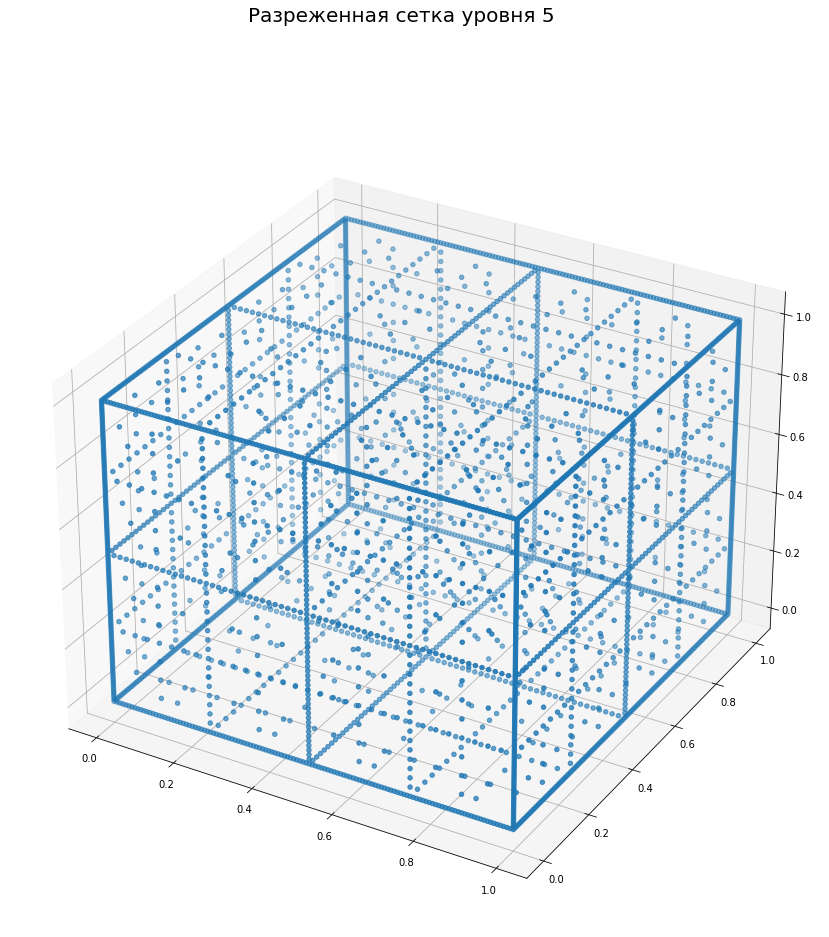

In [59]:
max_levels = [3, 4, 5, 6]

display_level = 5

headers = ['Функция\Уровень сетки'] + max_levels

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for max_level in max_levels:
        interpolator = SparseQuadraticInterpolator(f, 3, max_level)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if max_level == display_level and i_f==0:
            plot_3d_grid(interpolator, f'Разреженная сетка уровня {max_level}')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с разреженной сеткой')

### Адаптиная разреженная сетка

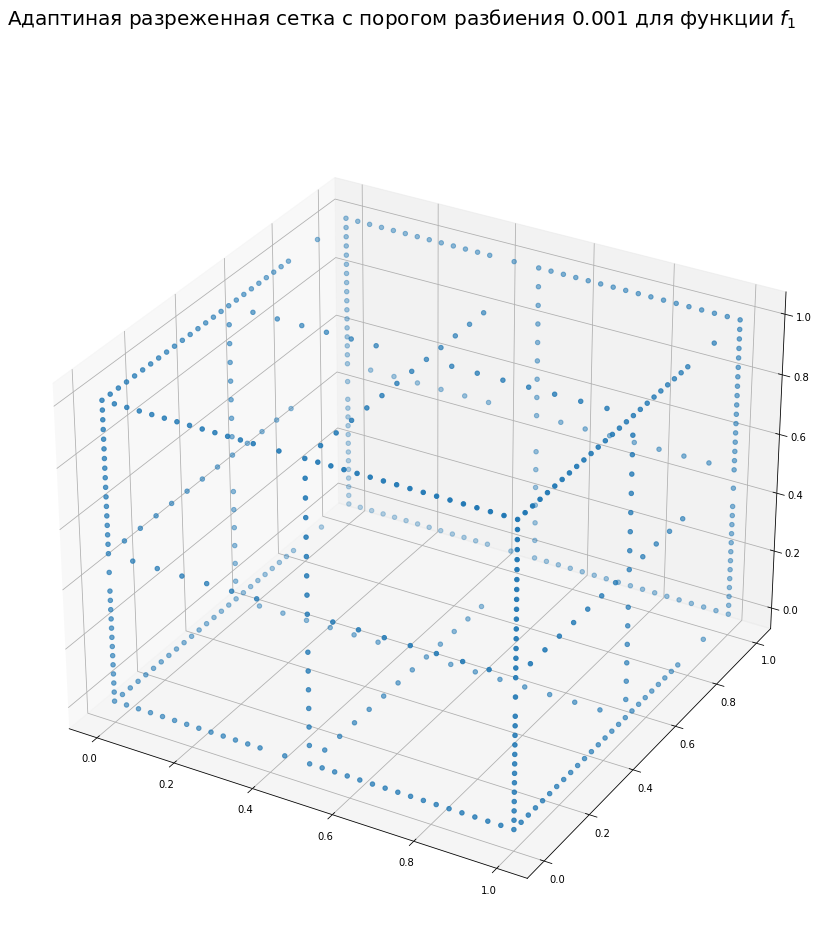

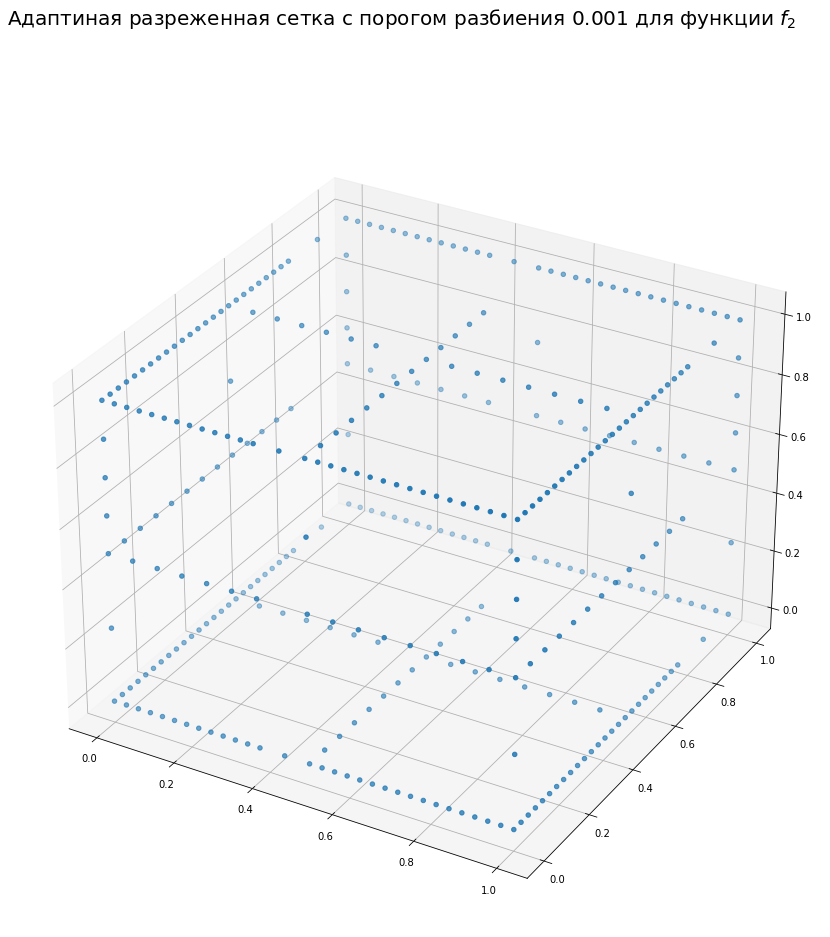

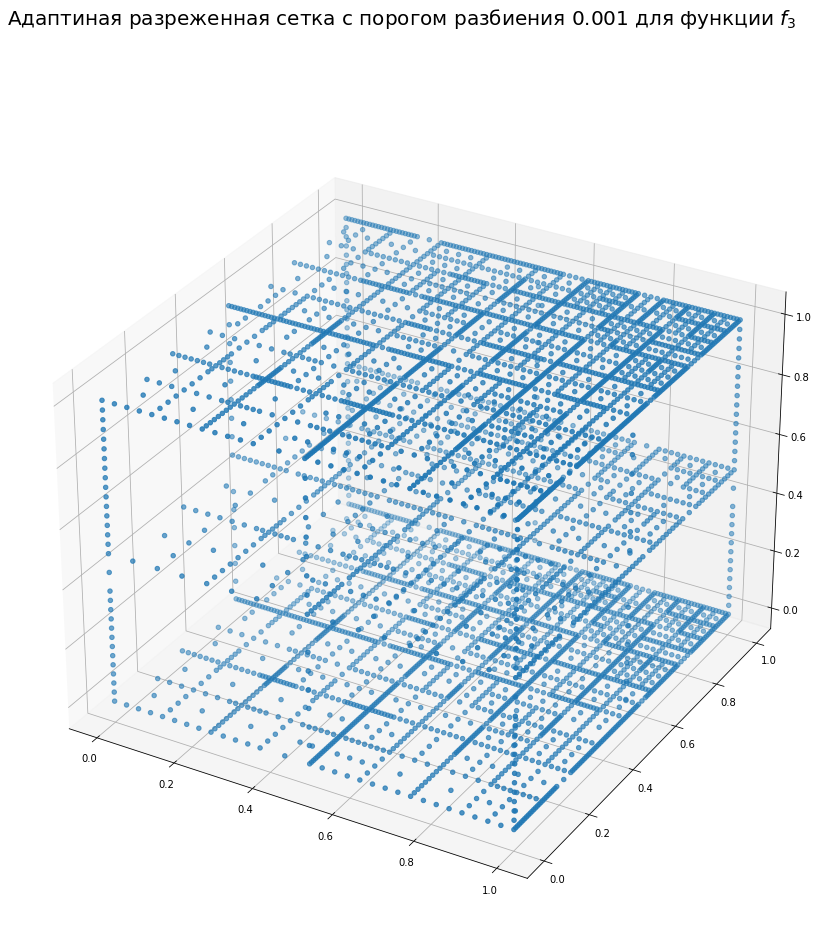

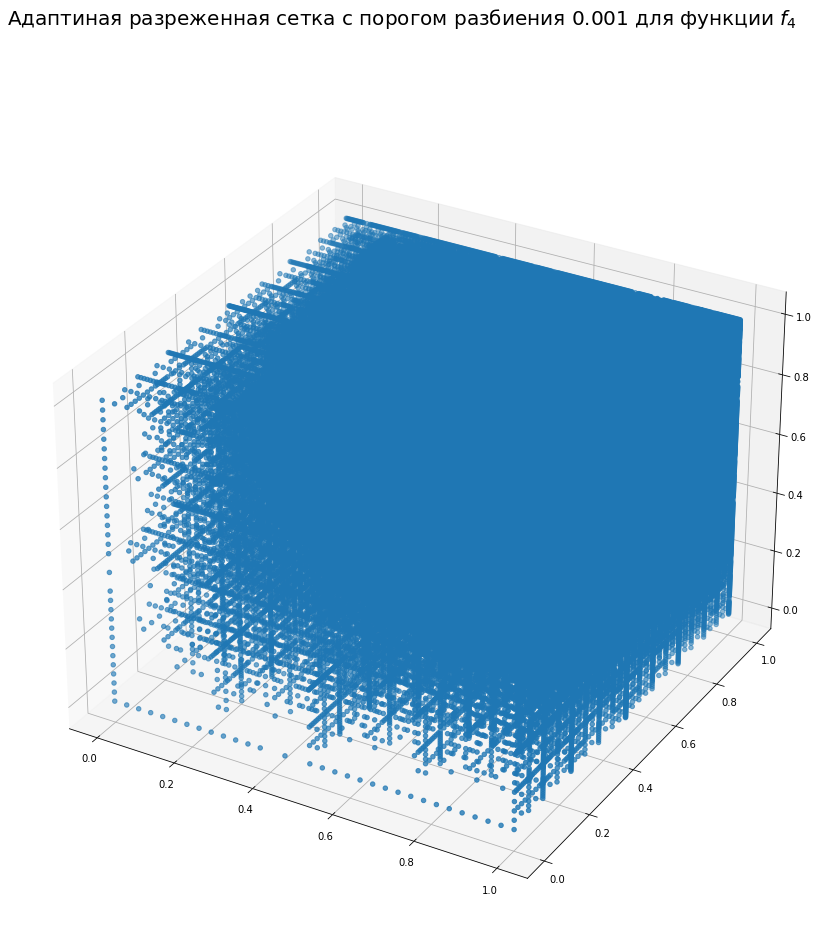

In [60]:
epss = [1e-1, 1e-2, 1e-3]

display_eps = 1e-3

headers = ['Функция\Порог разбиения сетки'] + epss

error_table = []
basis_count_table = []
for i_f, f in enumerate(f3args):
    f_name = f'f{i_f+1}'
    error_row = [f_name]
    basis_count_row = [f_name]
    for eps in epss:
        interpolator = AdaptiveQuadraticInterpolator(f, 3, eps)
        
        basis_count_row.append(len(interpolator.basis))
        error_row.append(estimate_error(interpolator))

        if display_eps == eps:
            plot_3d_grid(interpolator, f'Адаптиная разреженная сетка с порогом разбиения {eps} для функции $f_{i_f+1}$')
    
    error_table.append(error_row)
    basis_count_table.append(basis_count_row)

display_table(error_table, 'Ошибка при квадатичной итерполяции с адаптиной разреженной сеткой')
display_table(basis_count_table, 'Число базисных функций при квадатичной интерполяции с адаптиной разреженной сеткой')